# PCA


- step1. normalization
- step2. covariance matrix
- step3. eigen stuff (eigen vector, eigen - value)
- step4. principa component
- step5. reconstructing the original data

### Data Set


In [15]:
import numpy as np

x = np.array([170, 174, 172, 176, 168, 166])
y = np.array([68, 80, 79, 86, 60, 61])

In [17]:
import numpy as np

x = np.array([168.9, 165.1, 168.9, 176.4, 166.6, 171.2, 172.8, 172.0, 170.4, 171.9,
              174.1, 169.9, 168.7, 167.9, 169.0, 170.3, 174.5, 172.2, 165.9, 167.3,
              174.2, 170.5, 168.2, 169.3, 165.2, 163.3, 172.7, 175.3, 172.6, 166.2,
              168.0, 169.8, 169.6, 168.5, 168.3, 165.8, 173.6, 169.4, 167.2, 167.0,
              168.8, 168.5, 165.2, 167.2, 175.0, 174.5, 164.5, 172.0, 165.6, 169.1,
              170.6, 167.4, 170.0, 170.8, 166.8, 170.0, 171.8, 166.3, 172.3, 172.2,
              169.7, 167.9, 172.5, 174.7, 166.3, 167.3, 169.4, 172.1, 170.8, 168.4,
              167.2, 172.0, 169.2, 167.9, 170.0, 169.3, 166.5, 171.1, 165.9, 172.2,
              165.6, 172.1, 169.4, 171.8, 166.9, 168.7, 166.0, 170.0, 169.3, 174.6,
              169.5, 171.0, 166.3, 169.5, 174.1, 170.0, 167.5, 166.8, 170.9, 170.1])

y = np.array([64.8, 61.8, 65.5, 73.9, 64.2, 66.8, 70.4, 69.5, 64.2, 66.9,
              70.3, 64.7, 64.4, 63.8, 65.4, 66.7, 70.9, 70.2, 60.8, 64.1,
              70.1, 67.2, 65.4, 63.9, 62.1, 59.6, 69.6, 71.8, 68.8, 62.9,
              64.0, 65.8, 66.4, 65.0, 63.6, 61.6, 70.1, 67.5, 63.9, 62.6,
              63.8, 64.2, 62.7, 63.3, 70.9, 69.9, 61.0, 69.1, 62.2, 64.4,
              66.5, 63.1, 65.5, 66.9, 62.8, 65.5, 68.1, 63.1, 68.9, 68.3,
              66.7, 62.9, 69.2, 71.4, 62.7, 63.8, 65.2, 68.1, 66.8, 64.7,
              63.1, 68.1, 65.3, 63.5, 64.9, 65.4, 63.3, 66.4, 62.1, 68.9,
              62.3, 67.6, 65.8, 68.0, 62.7, 64.1, 61.9, 65.3, 66.1, 71.2,
              65.1, 66.4, 63.0, 65.2, 70.1, 66.5, 63.4, 62.7, 66.7, 65.3])


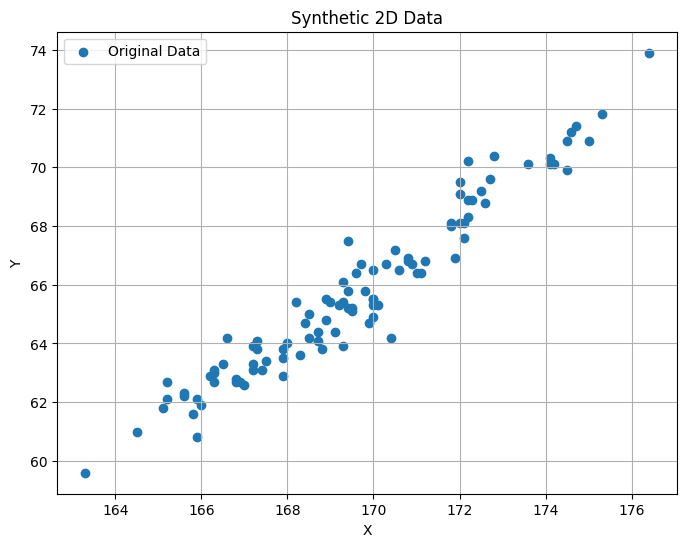

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Data Set
# IMPLEMENT HERE
data = np.column_stack((x, y))

# Plot the synthetic data
plt.figure(figsize=(8, 6))
plt.scatter(data[:, 0], data[:, 1], label='Original Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Synthetic 2D Data')
plt.grid(True)
plt.legend()
plt.show()

## PCA using sklearn

PCA components (principal axes):
 [[ 0.69251136  0.72140697]
 [ 0.72140697 -0.69251136]]
Explained variance ratio:
 [0.98354664 0.01645336]


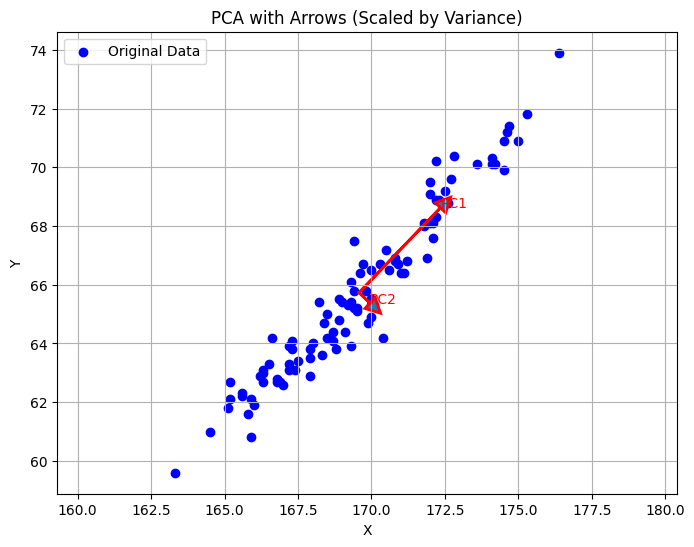

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# IMPLEMENT HERE
pca = PCA(n_components=2)
pca.fit(data)


print("PCA components (principal axes):\n", pca.components_)
print("Explained variance ratio:\n", pca.explained_variance_ratio_)

#######################
# Draw the graph
#######################
plt.figure(figsize=(8, 6))
plt.scatter(data[:, 0], data[:, 1], label='Original Data', color='blue')

mean = np.mean(data, axis=0)
for i in range(2):
    component = pca.components_[i]
    variance = pca.explained_variance_[i]
    # Arrow vector scaled by sqrt of variance
    vector = component * np.sqrt(variance)
    plt.arrow(mean[0], mean[1], vector[0], vector[1],
              head_width=0.5, head_length=0.5, ec='r', linewidth=2)
    plt.text(mean[0] + vector[0], mean[1] + vector[1], f'PC{i+1}', fontsize=10, color='red')

# Plot settings
plt.xlabel('X')
plt.ylabel('Y')
plt.title('PCA with Arrows (Scaled by Variance)')
plt.grid(True)
plt.axis('equal')
plt.legend()
plt.show()

## PCA from scratch

### Step1 Centering

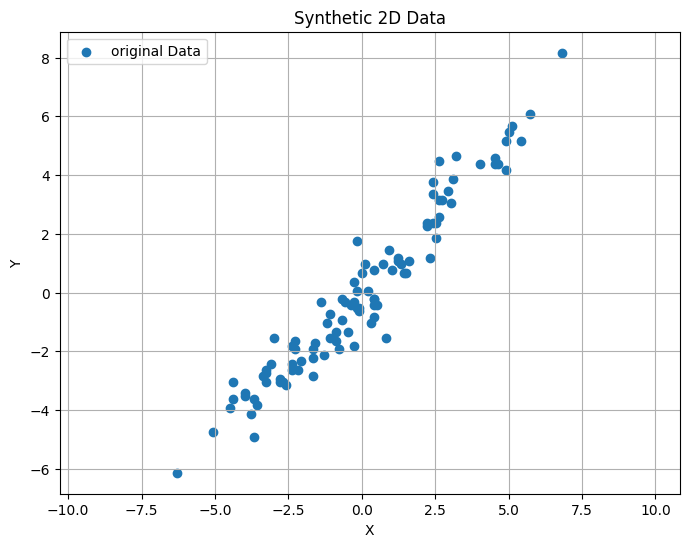

In [8]:
data = np.column_stack((x, y))

# IMPLEMENT HERE(cdata)
#data =
mean_data = np.mean(data, axis=0)
cdata = data - mean_data    ## centering data

# Plot the synthetic data
plt.figure(figsize=(8, 6))
plt.scatter(cdata[:, 0], cdata[:, 1], label='original Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Synthetic 2D Data')
plt.grid(True)
plt.legend()
plt.axis('equal')
plt.show()

### Step2. Covarinace Matrix

In [20]:
#IMPLEMENT HERE (cov from scratch)
cov_matrix = (cdata.T @ cdata) / (cdata.shape[0] - 1)
cov = np.cov(cdata, rowvar=False)


### Step3. Eigen Values & Vectors

In [24]:
# IMPLEMET HERE (eig_values, eig_vectors using np.linalg.eig)
eig_values, eig_vectors = np.linalg.eig(cov)

### Step4. Principal Component

In [30]:
# IMPLEMENT HERE (pc1: the larest eigvector principal component, proj_data)
pc1 = eig_vectors[:, -1]
proj_data = cdata @ pc1

### Step 5. Reconstructing the original data

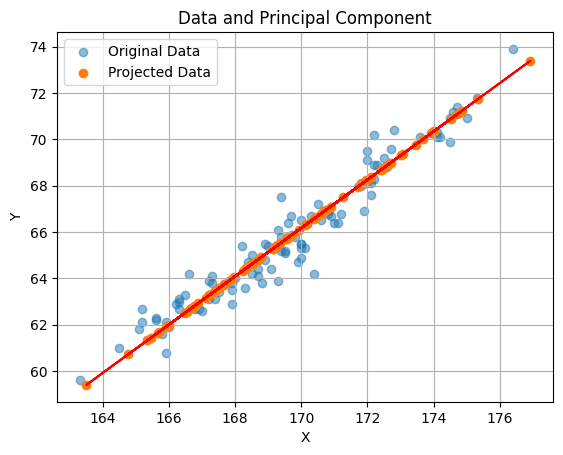

In [31]:
# IMPLEMENT HERE (recon)
recon = np.outer(proj_data, pc1) + mean_data

# Plot the original data and its projection
plt.scatter(data[:, 0], data[:, 1], alpha=0.5, label='Original Data')
plt.scatter(recon[:, 0], recon[:, 1], label='Projected Data')
plt.plot(recon[:, 0], recon[:, 1], 'r-')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Data and Principal Component')
plt.grid(True)
plt.legend()
plt.show()

## Homework: PCA for Image

In [13]:
import gdown
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from numpy.linalg import eig
from numpy import cov
from pylab import NullLocator
from PIL import Image

def LoadImage():
    file_id = "1cGDoITS_1sYlnbk8wdGc_WulUMMHGb43"
    url = f"https://drive.google.com/uc?id={file_id}"
    output = "horse.png"
    gdown.download(url, output, quiet=False)

    image = Image.open(output)
    img = np.array(image)
    img = img[:, :, 0]

    im_width, im_height = image.size
    pixel_block = 10
    features = []

    for i in range(0, im_height, pixel_block):  # row
        for j in range(0, im_width, pixel_block):  # column
            end_row = i + pixel_block
            end_column = j + pixel_block
            features.append(img[end_row - pixel_block:end_row, end_column - pixel_block:end_column])

    features = np.array(features)
    features = features.reshape(features.shape[0], features.shape[1] * features.shape[2])
    return features, img

Downloading...
From: https://drive.google.com/uc?id=1cGDoITS_1sYlnbk8wdGc_WulUMMHGb43
To: /content/horse.png
100%|██████████| 42.1k/42.1k [00:00<00:00, 46.1MB/s]


(400, 100)


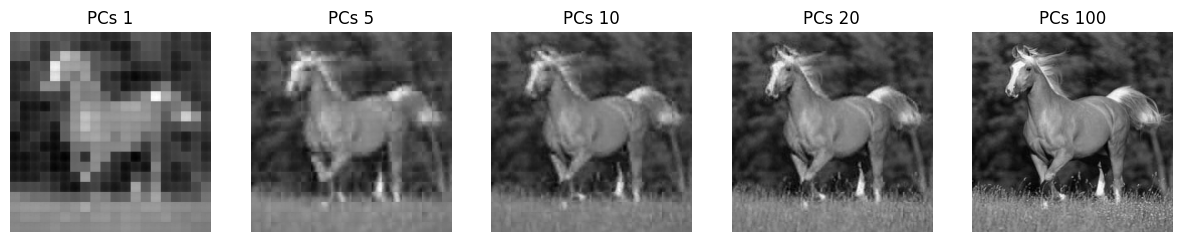

In [14]:
def PCA(features, image, n_components):
    # IMPLEMET HERE
    # step1. centering (X)
    X = features - np.mean(features, axis=0)

    # step2. covariance matrix from scratch
    cov_matrix = (X.T @ X) / (X.shape[0] - 1)

    # step3. get eigen values/vectors
    eig_values, eig_vectors = np.linalg.eigh(cov_matrix)

    # step4. principal components using sorting
    order = np.argsort(eig_values)[::-1]
    eig_values = eig_values[order]
    eig_vectors = eig_vectors[:, order]

    # projection of X
    Z = X @ eig_vectors

    num = 1
    plt.figure(figsize=(15, 5))
    for component in n_components:
        mu = np.mean(features, axis=0)
        num_eig, num_features = eig_vectors.shape

        # IMPLEMENT HERE
        T = Z[:, :component]
        E = eig_vectors[:, :component]
        R = T @ E.T + mu

        pixel_block = 10
        im_height, im_width = 200, 200
        reconstructed_image = np.zeros((im_height, im_width))
        x = 0
        for i in range(0, im_height, pixel_block):  # row
            for j in range(0, im_width, pixel_block):  # column
                end_row = i + pixel_block
                end_column = j + pixel_block
                reconstructed_image[end_row - pixel_block:end_row, end_column - pixel_block:end_column] = np.reshape(R[x], (10, 10))
                x += 1

        ax = plt.subplot(1, len(n_components), num)
        ax.axis('off')
        num += 1
        plt.imshow(np.flipud(reconstructed_image), cmap='gray', origin='lower')
        plt.title(f'PCs {component}')

# main
n_components = [1, 5, 10, 20, 100]
features, image = LoadImage()
print(features.shape)
PCA(features, image, n_components)

Expected Result

<a href="https://ibb.co/gLw9F1QJ"><img src="https://i.ibb.co/jPGfZKqD/image.png" alt="image" border="0"></a>